<a href="https://colab.research.google.com/github/pandey13shivanand/Projects/blob/main/CIFAR10_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
! kaggle competitions download -c cifar-10

 99% 706M/715M [00:03<00:00, 232MB/s]
100% 715M/715M [00:03<00:00, 224MB/s]


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile('/content/cifar-10.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
! pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.8/413.8 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 26.5 MB/s eta 0:00:00


In [ ]:
!ls


cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [ ]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z','r')
archive.extractall()
archive.close()
print('File extracted')

File extracted


In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
from PIL import Image

In [ ]:
filename = os.listdir('/content/train')

x = filename[0:5]
y = filename[-5:]

print(x)
print(y)


['11858.png', '25062.png', '7433.png', '45588.png', '32356.png']
['14247.png', '20112.png', '6341.png', '20251.png', '393.png']


In [ ]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [ ]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
labels_df[labels_df['id'] == 7765]


,id,label
7764,7765,truck


In [ ]:
labels_df.head()


,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
labels_df.tail()

,id,label
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [ ]:
labels_df['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [ ]:
labels_dictionary = {'airplane':0,'automobile':1,'bird':2,'cat':3,'deer':4,'dog':5,'frog':6,'horse':7,'ship':8,'truck':9}

In [ ]:
labels = [labels_dictionary[i] for i in labels_df['label']]

In [ ]:
print(labels[0:5])

[6, 9, 9, 4, 1]


In [ ]:
id_list = list(labels_df['id'])

In [ ]:
train_data_folder = '/content/train/'

data = []

for id in id_list:
  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)
#len(data)

list

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
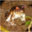

In [ ]:
data[0]

In [ ]:
X = np.array(data)
Y = np.array(labels)

In [ ]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


In [ ]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(40000, 32, 32, 3) (40000,) (10000, 32, 32, 3) (10000,)


In [ ]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255


In [ ]:
X_train_scaled[0]

array([[[0.81960784, 0.82352941, 0.79607843],
        [0.83529412, 0.83921569, 0.81960784],
        [0.85490196, 0.85882353, 0.84313725],
        ...,
        [0.49803922, 0.29019608, 0.15294118],
        [0.47843137, 0.26666667, 0.1372549 ],
        [0.45490196, 0.24705882, 0.1254902 ]],

       [[0.82352941, 0.82352941, 0.79215686],
        [0.83529412, 0.83921569, 0.81176471],
        [0.85490196, 0.8627451 , 0.83921569],
        ...,
        [0.48627451, 0.2745098 , 0.1372549 ],
        [0.4745098 , 0.2627451 , 0.12941176],
        [0.48235294, 0.27058824, 0.14117647]],

       [[0.80784314, 0.80392157, 0.76470588],
        [0.81960784, 0.81960784, 0.79215686],
        [0.83529412, 0.84313725, 0.81960784],
        ...,
        [0.48627451, 0.2745098 , 0.14509804],
        [0.51372549, 0.30196078, 0.16470588],
        [0.51372549, 0.30588235, 0.16078431]],

       ...,

       [[0.49803922, 0.42352941, 0.38039216],
        [0.54117647, 0.47843137, 0.43137255],
        [0.55294118, 0

In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
num_of_classes = 10

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(128,activation='softmax'),
    keras.layers.Dense(128,activation='sigmoid'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(num_of_classes,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 [==============================] - 7s 4ms/step - loss: 2.1562 - acc: 0.1606 - val_loss: 2.0970 - val_acc: 0.1855
Epoch 2/10
1125/1125 [==============================] - 4s 3ms/step - loss: 2.0974 - acc: 0.1753 - val_loss: 2.1065 - val_acc: 0.1725
Epoch 3/10
1125/1125 [==============================] - 4s 4ms/step - loss: 2.0859 - acc: 0.1765 - val_loss: 2.0755 - val_acc: 0.1912
Epoch 4/10
1125/1125 [==============================] - 5s 5ms/step - loss: 2.0849 - acc: 0.1758 - val_loss: 2.0580 - val_acc: 0.1955
Epoch 5/10
1125/1125 [==============================] - 4s 4ms/step - loss: 2.0744 - acc: 0.1783 - val_loss: 2.0540 - val_acc: 0.1930
Epoch 6/10
1125/1125 [==============================] - 4s 3ms/step - loss: 2.0749 - acc: 0.1791 - val_loss: 2.0760 - val_acc: 0.1898
Epoch 7/10
1125/1125 [==============================] - 4s 3ms/step - loss: 2.0684 - acc: 0.1785 - val_loss: 2.0777 - val_acc: 0.1885
Epoch 8/10
1125/1125 [==============================] - 5s 5ms

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers


In [ ]:
convolutional_base = ResNet50(weights='imagenet', include_top=False,input_shape=(256,256,3))

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
num_of_classesm= 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))

model.add(BatchNormalization())
model.add(Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))

model.add(BatchNormalization())
model.add(Dense(num_of_classes,activation='softmax'))


In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
history =  model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 [==============================] - 479s 393ms/step - loss: 1.6492 - acc: 0.4571 - val_loss: 0.8521 - val_acc: 0.7538
Epoch 2/10
1125/1125 [==============================] - 443s 394ms/step - loss: 0.8847 - acc: 0.7301 - val_loss: 0.3752 - val_acc: 0.8970
Epoch 3/10
1125/1125 [==============================] - 443s 394ms/step - loss: 0.5844 - acc: 0.8414 - val_loss: 0.2849 - val_acc: 0.9180
Epoch 4/10
1125/1125 [==============================] - 443s 394ms/step - loss: 0.4101 - acc: 0.8987 - val_loss: 0.2328 - val_acc: 0.9333
Epoch 5/10
1125/1125 [==============================] - 443s 394ms/step - loss: 0.2936 - acc: 0.9305 - val_loss: 0.2282 - val_acc: 0.9348
Epoch 6/10
1125/1125 [==============================] - 436s 388ms/step - loss: 0.2119 - acc: 0.9558 - val_loss: 0.2299 - val_acc: 0.9323
Epoch 7/10
1125/1125 [==============================] - 443s 394ms/step - loss: 0.1587 - acc: 0.9679 - val_loss: 0.2221 - val_acc: 0.9375
Epoch 8/10
1125/1125 [============

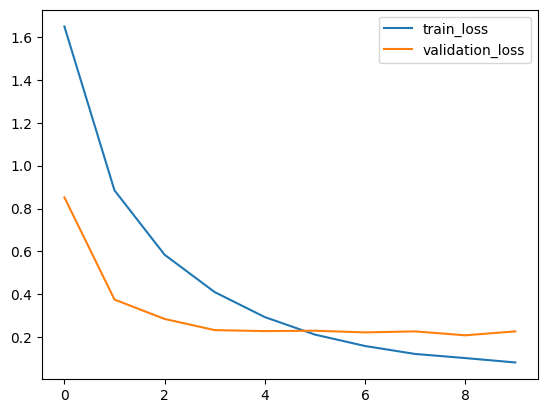

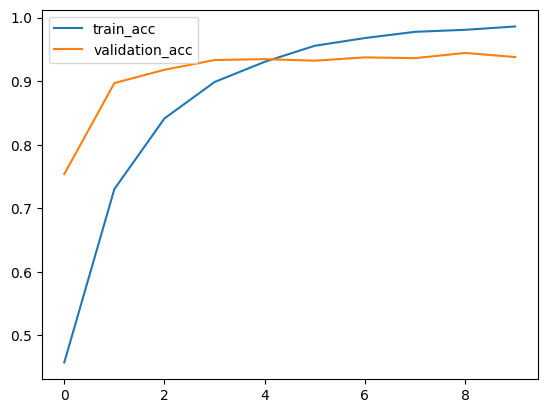

In [ ]:
h = history

plt.plot(h.history['loss'],label='train_loss')
plt.plot(h.history['val_loss'],label='validation_loss')
plt.legend()
plt.show()


plt.plot(h.history['acc'],label='train_acc')
plt.plot(h.history['val_acc'],label='validation_acc')
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled,Y_test)
print('Accuracy',accuracy)
print('Loss',loss)

313/313 [==============================] - 39s 118ms/step - loss: 0.2303 - acc: 0.9384
Accuracy 0.9383999705314636
Loss 0.23027513921260834
